## Part 1

### Q1.1 
### Histogrammer



In [16]:
import os
import time
import yaml
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

from hydesign.assembly.hpp_assembly import hpp_model
from hydesign.examples import examples_filepath

In [37]:
csv_path = str(Path(os.getcwd()).parent.parent) + "/hydesign/examples/Europe/GWA2/input_ts_Marijampole_LT.csv"

data_Marijampole = pd.read_csv(csv_path,
    index_col=0)

display(data_Marijampole)


,WS_1,WS_50,WS_100,WS_150,WS_200,WD_1,WD_50,WD_100,WD_150,WD_200,temp_air_1,ghi,dni,dhi,Price
Unnamed: 0,,,,,,,,,,,,,,,
2012-01-01 00:00:00,0.0100,3.1421,4.7760,5.9066,6.5347,271.3802,278.7789,286.3287,293.8784,301.4282,270.6143,0.01,0.01,0.01,31.163
2012-01-01 01:00:00,0.4483,3.3321,4.8023,5.8109,6.3627,260.0322,268.3778,276.8936,285.4094,293.9252,270.5281,0.01,0.01,0.01,31.163
2012-01-01 02:00:00,0.2514,3.1555,4.6463,5.6722,6.2366,250.9714,258.8761,266.9421,275.0081,283.0740,270.2264,0.01,0.01,0.01,31.163
2012-01-01 03:00:00,0.5311,3.5833,5.1836,6.2953,6.9171,244.6931,252.3080,260.0783,267.8486,275.6189,269.9671,0.01,0.01,0.01,31.163
2012-01-01 04:00:00,1.1617,4.3300,6.0025,7.1680,7.8234,241.4503,248.9593,256.6215,264.2838,271.9460,270.0519,0.01,0.01,0.01,31.163
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-30 19:00:00,1.0274,6.3462,8.5950,10.0071,10.6464,222.9715,226.7900,230.6864,234.5828,238.4793,274.6222,0.01,0.01,0.01,35.875
2012-12-30 20:00:00,1.2988,6.9335,9.2803,10.7429,11.3920,230.0690,233.3343,236.6663,239.9983,243.3302,275.3689,0.01,0.01,0.01,33.971
2012-12-30 21:00:00,1.2801,7.0699,9.4592,10.9412,11.5907,235.6972,238.6603,241.6839,244.7074,247.7310,275.2330,0.01,0.01,0.01,33.105


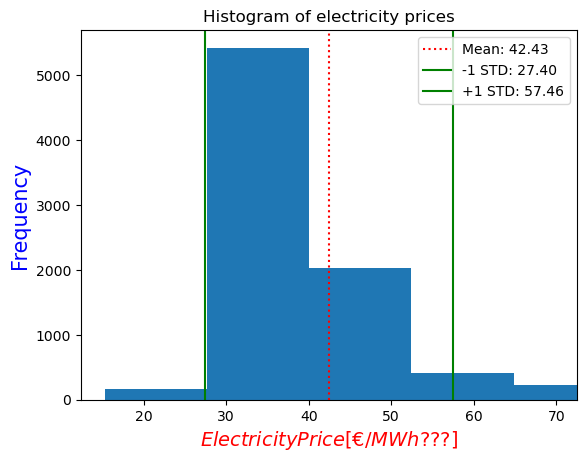

In [56]:
el_prices=data_Marijampole['Price']

el_price_std=el_prices.std()
el_price_mean=el_prices.mean()

plt.hist(el_prices, bins=10)
plt.title('Histogram of electricity prices')
plt.xlim(el_price_mean - 2*el_price_std, el_price_mean + 2*el_price_std)
plt.ylabel('Frequency', fontsize=15, color='blue')
plt.xlabel('$Electricity   Price [€/MWh???]$', fontsize=14, color='red')
plt.axvline(el_price_mean, ls=':',  color='red', label=f'Mean: {el_price_mean:.2f}')
plt.axvline(el_price_mean-el_price_std, color='green',label=f'-1 STD: {(el_price_mean - el_price_std):.2f}')
plt.axvline(el_price_mean+el_price_std, color='green', label=f'+1 STD: {(el_price_mean + el_price_std):.2f}')
plt.legend()
plt.show()

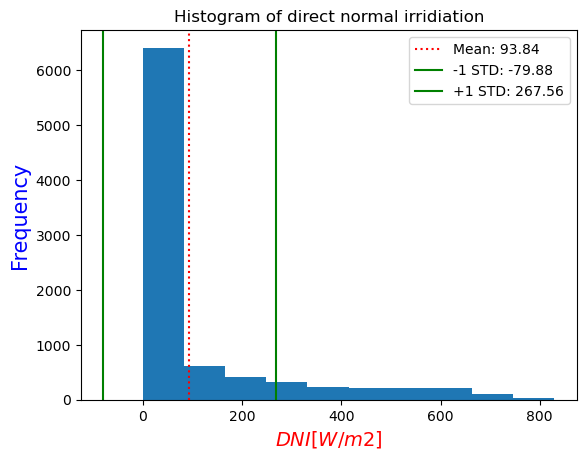

In [71]:
dhi=data_Marijampole['dni']

dhi_std=dhi.std()
dhi_mean=dhi.mean()

plt.hist(dhi, bins=10)
plt.title('Histogram of direct normal irridiation')
plt.ylabel('Frequency', fontsize=15, color='blue')
plt.xlabel('$DNI [W/m2]$', fontsize=14, color='red')
plt.axvline(dhi_mean, ls=':',  color='red', label=f'Mean: {dhi_mean:.2f}')
plt.axvline(dhi_mean-dhi_std, color='green',label=f'-1 STD: {(dhi_mean - dhi_std):.2f}')
plt.axvline(dhi_mean+dhi_std, color='green', label=f'+1 STD: {(dhi_mean + dhi_std):.2f}')
plt.legend()
plt.show()

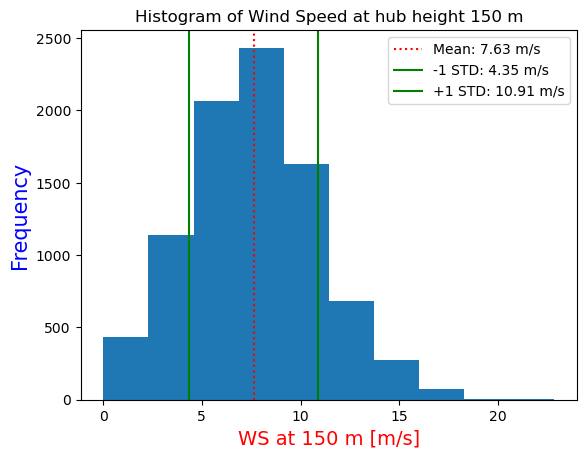

In [61]:
ws_150 = data_Marijampole['WS_150']

ws_150_mean = ws_150.mean()
ws_150_std = ws_150.std()

plt.hist(ws_150, bins=10)
plt.title('Histogram of Wind Speed at hub height 150 m')
plt.ylabel('Frequency', fontsize=15, color='blue')
plt.xlabel('WS at 150 m [m/s]', fontsize=14, color='red')

plt.axvline(ws_150_mean, ls=':', color='red', label=f'Mean: {ws_150_mean:.2f} m/s')
plt.axvline(ws_150_mean - ws_150_std, color='green', label=f'-1 STD: {(ws_150_mean - ws_150_std):.2f} m/s')
plt.axvline(ws_150_mean + ws_150_std, color='green', label=f'+1 STD: {(ws_150_mean + ws_150_std):.2f} m/s')

plt.legend()
plt.show()

### Correlations

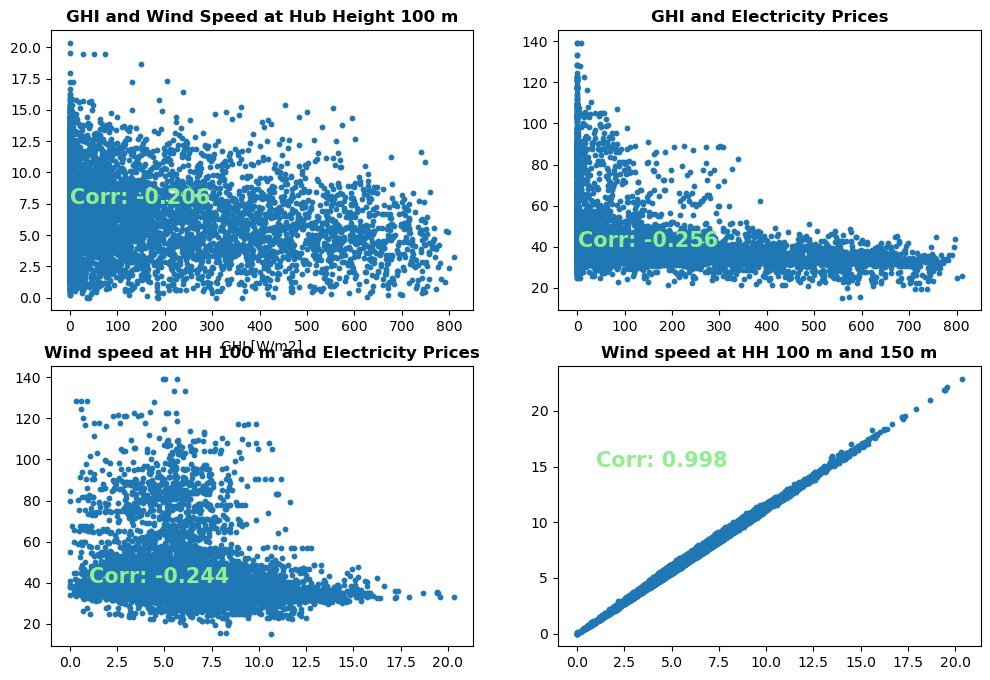

In [60]:
ghi=data_Marijampole['ghi']
ws_100=data_Marijampole['WS_100']
ws_150 = data_Marijampole["WS_150"]

fig, axes = plt.subplots(2, 2, figsize=(12, 8))

corr_ghi_WS100=np.round(np.corrcoef(ghi, ws_100)[0,1],3)
axes[0,0].scatter(ghi,ws_100, s=10)
axes[0,0].text(1,7.5,f'Corr: {corr_ghi_WS100}',fontsize=15,color='lightgreen',fontweight='bold')
axes[0,0].set_title('GHI and Wind Speed at Hub Height 100 m',fontweight='bold')
axes[0,0].set_xlabel("GHI [W/m2]")

corr_ghi_el_prices=np.round(np.corrcoef(ghi, el_prices)[0,1],3)
axes[0,1].scatter(ghi,el_prices, s=10)
axes[0,1].text(1,40,f'Corr: {corr_ghi_el_prices}',fontsize=15,color='lightgreen',fontweight='bold')
axes[0,1].set_title('GHI and Electricity Prices',fontweight='bold')

# correlation WS vs electricity prices
corr_WS100_el_prices=np.round(np.corrcoef(ws_100, el_prices)[0,1],3)
axes[1,0].scatter(ws_100,el_prices, s=10)
axes[1,0].text(1,40,f'Corr: {corr_WS100_el_prices}',fontsize=15,color='lightgreen',fontweight='bold')
axes[1,0].set_title('Wind speed at HH 100 m and Electricity Prices',fontweight='bold')

# correlation of wind speeds at diffrent hub heights (100m and 150m)
corr_WS100_WS150=np.round(np.corrcoef(ws_100, ws_150)[0,1],3)
axes[1,1].scatter(ws_100,ws_150, s=10)
axes[1,1].text(1,15,f'Corr: {corr_WS100_WS150}',fontsize=15,color='lightgreen',fontweight='bold')
axes[1,1].set_title('Wind speed at HH 100 m and 150 m',fontweight='bold')

# 'Axis Labels'
# ax[0].set_xlabel('Time', fontsize=15)
# ax[1].set_xlabel('Time', fontsize=15)
# ax[0].set_ylabel('Value', fontsize=15)


plt.show()

### Q2: good wind or good solar?

In [ ]:
installed_cap = 200 # MW

# capacity factor for WPP
AEP_WPP = 342.926*1000 # MWh
wind_rated = 200 # MW
CF_WPP = AEP_WPP/(wind_rated*24*365)
print(f"CF_WPP = {CF_WPP}")

# capacity factor for SPP
AEP_SPP = 217.454*1000 # MWh
solar_rated = 200 # MW

CF_SPP = AEP_SPP/(solar_rated*24*365)
print(f"CF_SPP = {CF_SPP}")

# capacity factor for 100 MW solar 100 MW wind, 300 MW grid
AEP_100_100 = 280.965*1000 # MWh
ratio_100_100 = 100/200 # solar cap / total cap
CF_100_100 = AEP_100_100/(installed_cap*24*365)
print(f"CF_100_100 = {CF_100_100}")

# capacity factor for 150 MW solar 50 MW wind, 300 MW grid
AEP_150_100 = 249.101*1000 # MWh
ratio_100_100 = 150/200 # solar cap / total cap
CF_150_100 = AEP_150_100/(installed_cap*24*365)
print(f"CF_150_100 = {CF_150_100}")

# capacity factor for 50 MW solar 150 MW wind, 300 MW grid
AEP_100_100 = 312.446*1000 # MWh
ratio_100_100 = 1/200 # solar cap / total cap
CF_100_100 = AEP_100_100/(installed_cap*24*365)
print(f"CF_100_100 = {CF_100_100}")





CF_WPP = 0.1957340182648402
CF_SPP = 0.12411757990867579
CF_100_100 = 0.16036815068493152
CF_150_100 = 0.14218093607305937
